In [1]:
# Import required libraries
import pandas as pd
import plotly.express as px
import dash
from dash import html
from dash import dcc
from dash.dependencies import Input, Output

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import ssl

try:
   _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Coding-with-Adam/Dash-by-Plotly/master/Other/Dash_Introduction/intro_bees.csv')
df.head()

,Program,Year,Period,State,ANSI,Affected by,Pct of Colonies Impacted,state_code
0,SURVEY,2019,JAN THRU MAR,Alabama,1,Disease,1.8,AL
1,SURVEY,2019,JAN THRU MAR,Alabama,1,Other,3.1,AL
2,SURVEY,2019,JAN THRU MAR,Alabama,1,Pesticides,0.3,AL
3,SURVEY,2019,JAN THRU MAR,Alabama,1,Pests_excl_Varroa,22.7,AL
4,SURVEY,2019,JAN THRU MAR,Alabama,1,Unknown,9.0,AL


In [5]:
df = df.groupby(['State', 'ANSI', 'Affected by', 'Year', 'state_code'])[['Pct of Colonies Impacted']].mean()
df.reset_index(inplace=True)
df[:5]

,State,ANSI,Affected by,Year,state_code,Pct of Colonies Impacted
0,Alabama,1,Disease,2015,AL,0.05
1,Alabama,1,Disease,2016,AL,1.20
2,Alabama,1,Disease,2017,AL,2.25
3,Alabama,1,Disease,2018,AL,1.30
4,Alabama,1,Disease,2019,AL,1.80


# Choropleth 

In [ ]:
# Import required libraries
import pandas as pd
import plotly.express as px
import dash
from dash import html
from dash import dcc
from dash.dependencies import Input, Output

# SLL Error
import ssl

try:
   _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

# LOad Data    
df = pd.read_csv('https://raw.githubusercontent.com/Coding-with-Adam/Dash-by-Plotly/master/Other/Dash_Introduction/intro_bees.csv')    
# Create New Data
df = df.groupby(['State', 'ANSI', 'Affected by', 'Year', 'state_code'])[['Pct of Colonies Impacted']].mean()
df.reset_index(inplace=True)


# ------------------------------------------------------------------------------
# Data 
df

# App
app = dash.Dash(__name__)

# App layout
app.layout = html.Div([

    html.H1("Web Application Dashboards with Dash", style={'text-align': 'center'}),

    dcc.Dropdown(id="slct_year",
                 options=[
                     {"label": "2015", "value": 2015},
                     {"label": "2016", "value": 2016},
                     {"label": "2017", "value": 2017},
                     {"label": "2018", "value": 2018}],
                 multi=False,
                 value=2015,
                 style={'width': "40%"}
                 ),

    html.Div(id='output_container', children=[]),
    html.Br(),

    dcc.Graph(id='my_bee_map', figure={})

])

# ------------------------------------------------------------------------------
# Connect the Plotly graphs with Dash Components
@app.callback(
    [Output(component_id='output_container', component_property='children'),
     Output(component_id='my_bee_map', component_property='figure')],
    [Input(component_id='slct_year', component_property='value')]
)
def update_graph(option_slctd):
    print(option_slctd)
    print(type(option_slctd))

    container = "The year chosen by user was: {}".format(option_slctd)

    dff = df.copy()
    dff = dff[dff["Year"] == option_slctd]
    dff = dff[dff["Affected by"] == "Varroa_mites"]

    # Plotly Express
    fig = px.choropleth(
        data_frame=dff,
        locationmode='USA-states',
        locations='state_code',
        scope="usa",
        color='Pct of Colonies Impacted',
        hover_data=['State', 'Pct of Colonies Impacted'],
        color_continuous_scale=px.colors.sequential.YlOrRd,
        labels={'Pct of Colonies Impacted': '% of Bee Colonies'},
        template='plotly_dark'
    )

    # Plotly Graph Objects (GO)
    # fig = go.Figure(
    #     data=[go.Choropleth(
    #         locationmode='USA-states',
    #         locations=dff['state_code'],
    #         z=dff["Pct of Colonies Impacted"].astype(float),
    #         colorscale='Reds',
    #     )]
    # )
    #
    # fig.update_layout(
    #     title_text="Bees Affected by Mites in the USA",
    #     title_xanchor="center",
    #     title_font=dict(size=24),
    #     title_x=0.5,
    #     geo=dict(scope='usa'),
    # )

    return container, fig

!pip install dash
print('============> Install Completed  <==================')
# ------------------------------------------------------------------------------
if __name__ == '__main__':
    app.run_server()

============> Install Completed  <==================
Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
2015
<class 'int'>
2015
<class 'int'>
2016
<class 'int'>
2017
<class 'int'>
2018
<class 'int'>
2016
<class 'int'>
2015
<class 'int'>


127.0.0.1 - - [01/Sep/2022 22:25:00] code 400, message Bad request version ('ßpËZiuÐI2ðæh\x82È-&\x9b\x00"\x13\x01\x13\x03\x13\x02À+À/Ì©Ì¨À,À0À')
127.0.0.1 - - [01/Sep/2022 22:26:44] code 400, message Bad request version ('Û>âøÏ\x83\x11ÈT\x08V¸\x00"\x13\x01\x13\x03\x13\x02À+À/Ì©Ì¨À,À0À')
127.0.0.1 - - [01/Sep/2022 22:26:45] code 400, message Bad request version ('©+!îÓ\x03I°«1\x0eWæc¿')
127.0.0.1 - - [01/Sep/2022 22:26:46] code 400, message Bad request version ('ÀµT\x9e\x9bùn«â\x00"\x13\x01\x13\x03\x13\x02À+À/Ì©Ì¨À,À0À')
127.0.0.1 - - [01/Sep/2022 22:26:46] code 400, message Bad request syntax ('\x16\x03\x01\x02\x00\x01\x00\x01ü\x03\x03u\x0euê\x809~¨Êòs"')
127.0.0.1 - - [01/Sep/2022 22:26:46] code 400, message Bad request version ('\x10R\x17ô¹øÈÈ\x07#o@ëÎû%)_RÖÂ7\x96ÞäO\x0ej\x1a?\x1bÐ\x00"\x13\x01\x13\x03\x13\x02À+À/Ì©Ì¨À,À0À')
127.0.0.1 - - [01/Sep/2022 22:26:46] code 400, message Bad request version ('_{\x16ø_«·')
127.0.0.1 - - [01/Sep/2022 22:27:01] code 400, message Bad HTTP/0.9 req

2015
<class 'int'>
2015
<class 'int'>
2015
<class 'int'>
2016
<class 'int'>
2017
<class 'int'>
2018
<class 'int'>
2015
<class 'int'>
2015
<class 'int'>
2015
<class 'int'>


# Bar Chart

In [ ]:
# Load Data    
df = pd.read_csv('https://raw.githubusercontent.com/Coding-with-Adam/Dash-by-Plotly/master/Other/Dash_Introduction/intro_bees.csv')    

# App
app = dash.Dash(__name__)

# Layout

app.layout = html.Div([

    html.H1("Web Application Dashboards with Dash", style={'text-align': 'center'}),

    dcc.Dropdown(id="slct_year",
                 options=[
                     {"label": "2015", "value": 2015},
                     {"label": "2016", "value": 2016},
                     {"label": "2017", "value": 2017},
                     {"label": "2018", "value": 2018}],
                 multi=False,
                 value=2015,
                 style={'width': "40%"}
                 ),
    html.Div(id='output_container', children=[]),
    
    html.Br(),

    dcc.Graph(id='my_bee_map', figure={})

])


In [4]:
df.head()

,Program,Year,Period,State,ANSI,Affected by,Pct of Colonies Impacted,state_code
0,SURVEY,2019,JAN THRU MAR,Alabama,1,Disease,1.8,AL
1,SURVEY,2019,JAN THRU MAR,Alabama,1,Other,3.1,AL
2,SURVEY,2019,JAN THRU MAR,Alabama,1,Pesticides,0.3,AL
3,SURVEY,2019,JAN THRU MAR,Alabama,1,Pests_excl_Varroa,22.7,AL
4,SURVEY,2019,JAN THRU MAR,Alabama,1,Unknown,9.0,AL


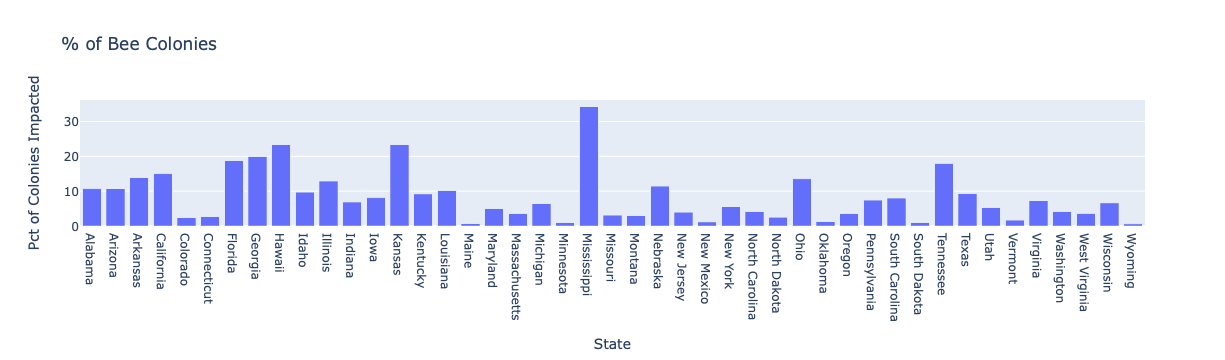

In [25]:
year = 2019
data = df.loc[df.Year == year].groupby(['State'])['Pct of Colonies Impacted'].mean().reset_index()

fig = px.bar(data, x='State', y='Pct of Colonies Impacted', title='% of Bee Colonies')
fig.show()

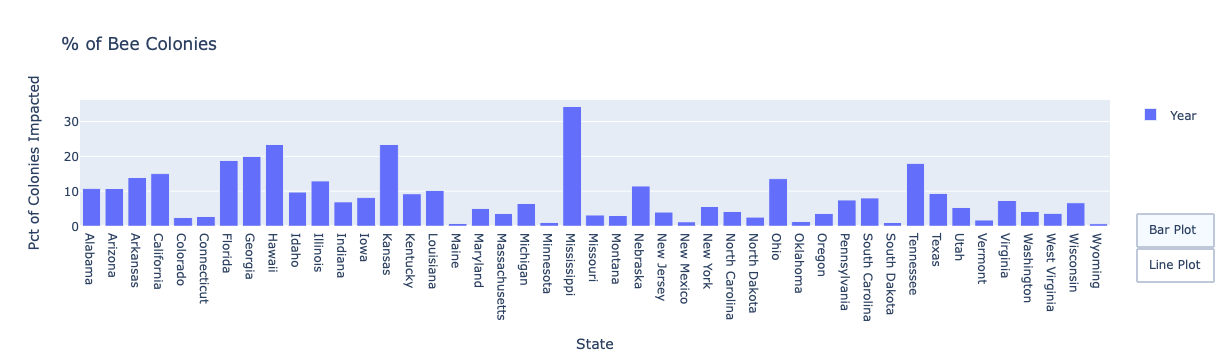

In [74]:
# LOad Data    
#df = pd.read_csv('https://raw.githubusercontent.com/Coding-with-Adam/Dash-by-Plotly/master/Other/Dash_Introduction/intro_bees.csv') 

year = 2019
data = df.loc[df.Year == year].groupby(['State'])['Pct of Colonies Impacted'].mean().reset_index()

fig = px.bar(data, x='State', y='Pct of Colonies Impacted', title='% of Bee Colonies')

butonlar = [
    {'label': 'Bar Plot',  # Butonun üzerindeki text
     'method': 'update',  # buton ne yapacak (grafiği güncelleyecek)
     'args': [{'type': 'bar'}]  # figür'e yollanacak parametreler
     },

    {'label': 'Line Plot',
     'method': 'update',
     'args': [{'type': 'line'}]
     }
]


fig.update_layout({
    'updatemenus': [{'type': 'buttons',  # butonlar ekleyeceğiz
                     'direction': 'down',  # butonlar'ın yönü
                     'x': 1.1, 'y': 0.1,  # x/y koordinat
                     'showactive': True,  # gözüksün mü
                     'active': 0, # butonlar listesindeki hangi indexteki eleman seçili gelecek
                     'buttons': butonlar  #  hangi buton listesi
                     }]
})

fig.update_traces(name='State', showlegend= True)

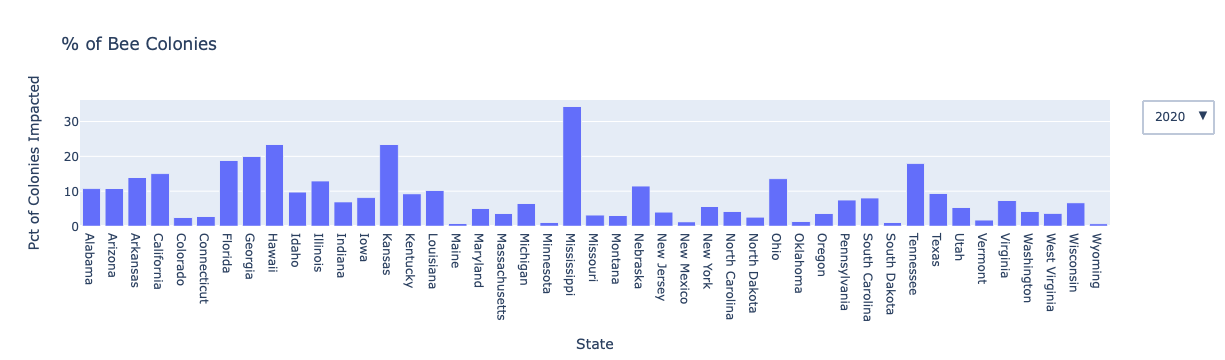

In [55]:
# LOad Data    
df = pd.read_csv('https://raw.githubusercontent.com/Coding-with-Adam/Dash-by-Plotly/master/Other/Dash_Introduction/intro_bees.csv') 


data = df.loc[df.Year == year].groupby(['State'])['Pct of Colonies Impacted'].mean().reset_index()

fig = px.bar(data, x='State', y='Pct of Colonies Impacted', title='% of Bee Colonies')

butonlar = [
    {'label': '2018',
     'label': '2019',
     'label': '2020',# Butonun üzerindeki text
     'method': 'relayout',  # buton ne yapacak (grafiği güncelleyecek)
     'args': [{'type': [2018, 2019, 2020]}]  # figür'e yollanacak parametreler
     },

]


fig.update_layout({
    'updatemenus': [{'type': 'dropdown',  # butonlar ekleyeceğiz
                     'direction': 'down',  # butonlar'ın yönü
                     'x': 1.1, 'y': 1.,  # x/y koordinat
                     'showactive': True,  # gözüksün mü
                     'active': 0, # butonlar listesindeki hangi indexteki eleman seçili gelecek
                     'buttons': butonlar  #  hangi buton listesi
                     }]
})



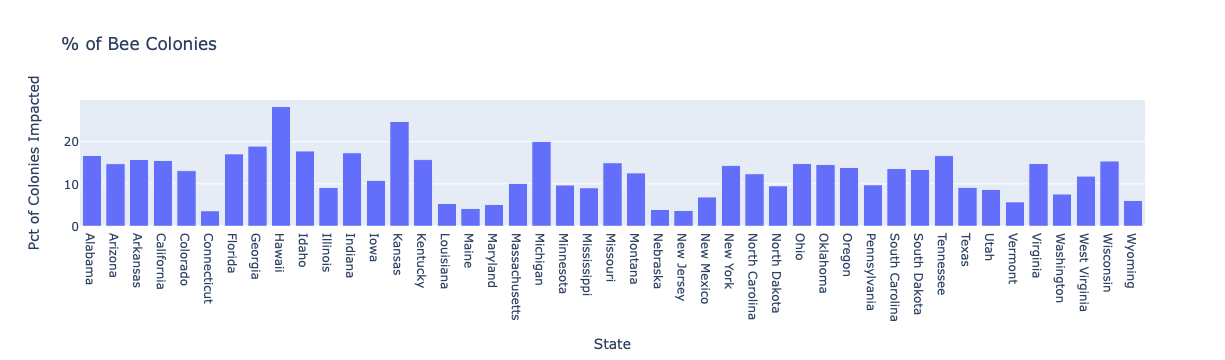

In [65]:
# LOad Data    
df = pd.read_csv('https://raw.githubusercontent.com/Coding-with-Adam/Dash-by-Plotly/master/Other/Dash_Introduction/intro_bees.csv')

data = df.loc[df.Year == 2018].groupby(['State'])['Pct of Colonies Impacted'].mean().reset_index()

fig = px.bar(data, x='State', y='Pct of Colonies Impacted', title='% of Bee Colonies')
fig.show()

In [57]:
year

2019

In [64]:
df = pd.read_csv('https://raw.githubusercontent.com/Coding-with-Adam/Dash-by-Plotly/master/Other/Dash_Introduction/intro_bees.csv')

data = df.loc[df.Year == 2017].groupby(['State'])['Pct of Colonies Impacted'].mean().reset_index()
data.head()

,State,Pct of Colonies Impacted
0,Alabama,12.312500
1,Arizona,12.233333
2,Arkansas,14.108333
3,California,14.604167
4,Colorado,8.887500


In [76]:
df.head()

,Program,Year,Period,State,ANSI,Affected by,Pct of Colonies Impacted,state_code
0,SURVEY,2019,JAN THRU MAR,Alabama,1,Disease,1.8,AL
1,SURVEY,2019,JAN THRU MAR,Alabama,1,Other,3.1,AL
2,SURVEY,2019,JAN THRU MAR,Alabama,1,Pesticides,0.3,AL
3,SURVEY,2019,JAN THRU MAR,Alabama,1,Pests_excl_Varroa,22.7,AL
4,SURVEY,2019,JAN THRU MAR,Alabama,1,Unknown,9.0,AL


In [81]:
df.loc[df.State == 'Alabama', :].query('Year>2016').head()

,Program,Year,Period,State,ANSI,Affected by,Pct of Colonies Impacted,state_code
0,SURVEY,2019,JAN THRU MAR,Alabama,1,Disease,1.8,AL
1,SURVEY,2019,JAN THRU MAR,Alabama,1,Other,3.1,AL
2,SURVEY,2019,JAN THRU MAR,Alabama,1,Pesticides,0.3,AL
3,SURVEY,2019,JAN THRU MAR,Alabama,1,Pests_excl_Varroa,22.7,AL
4,SURVEY,2019,JAN THRU MAR,Alabama,1,Unknown,9.0,AL
